In [1]:
from sklearn.preprocessing import MinMaxScaler
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#from keras.models import Sequential

In [2]:
df=pd.read_csv(r"C:\Users\86130\00.Project\03.Datasets\After processing 15mins data-1126.csv")
print(df)#### Re-import the dataset. Import populates the complete dataset using median resampling

        Unnamed: 0             datatime  total power usage（kw）
0                0  2018-01-01 00:00:00            244033.7682
1                1  2018-01-01 00:15:00            232720.6402
2                2  2018-01-01 00:30:00            231685.6891
3                3  2018-01-01 00:45:00            227581.3317
4                4  2018-01-01 01:00:00            233482.4269
...            ...                  ...                    ...
128539      128539  2021-08-31 22:45:00            202409.1270
128540      128540  2021-08-31 23:00:00            218576.4635
128541      128541  2021-08-31 23:15:00            200112.5091
128542      128542  2021-08-31 23:30:00            199865.5937
128543      128543  2021-08-31 23:45:00            198483.5592

[128544 rows x 3 columns]


In [3]:
df = df.drop(columns='Unnamed: 0')
df.head()

,datatime,total power usage（kw）
0,2018-01-01 00:00:00,244033.7682
1,2018-01-01 00:15:00,232720.6402
2,2018-01-01 00:30:00,231685.6891
3,2018-01-01 00:45:00,227581.3317
4,2018-01-01 01:00:00,233482.4269


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame (replace this with your actual data)
data = df  # Load dataset from a CSV file

In [5]:
data.head()

,datatime,total power usage（kw）
0,2018-01-01 00:00:00,244033.7682
1,2018-01-01 00:15:00,232720.6402
2,2018-01-01 00:30:00,231685.6891
3,2018-01-01 00:45:00,227581.3317
4,2018-01-01 01:00:00,233482.4269


In [6]:
## Convert datatime column to datetime format
df['datatime'] = pd.to_datetime(df['datatime'])

In [7]:
# Extract date components
df['year'] = df['datatime'].dt.year
df['month'] = df['datatime'].dt.month
df['day'] = df['datatime'].dt.day
df['hour'] = df['datatime'].dt.hour

# Add a column indicating whether it's a weekend
df['is_weekend'] = (df['datatime'].dt.dayofweek // 5 == 1).astype(int)

# Optional: If you want to check the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['day_of_week'] = df['datatime'].dt.dayofweek

In [8]:
df.head()

,datatime,total power usage（kw）,year,month,day,hour,is_weekend,day_of_week
0,2018-01-01 00:00:00,244033.7682,2018,1,1,0,0,0
1,2018-01-01 00:15:00,232720.6402,2018,1,1,0,0,0
2,2018-01-01 00:30:00,231685.6891,2018,1,1,0,0,0
3,2018-01-01 00:45:00,227581.3317,2018,1,1,0,0,0
4,2018-01-01 01:00:00,233482.4269,2018,1,1,1,0,0


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming 'datatime' is the index of your DataFrame
df['datatime'] = pd.to_datetime(df['datatime'])

# Separate the target variable and features
y = df['total power usage（kw）']
X = df.drop(['total power usage（kw）','datatime'], axis=1)

In [10]:
# Create a RandomForestRegressor and fit the model
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [11]:
feature_importance = model.feature_importances_
print(feature_importance)

[0.21557072 0.49799288 0.09926048 0.1642043  0.00339834 0.01957328]


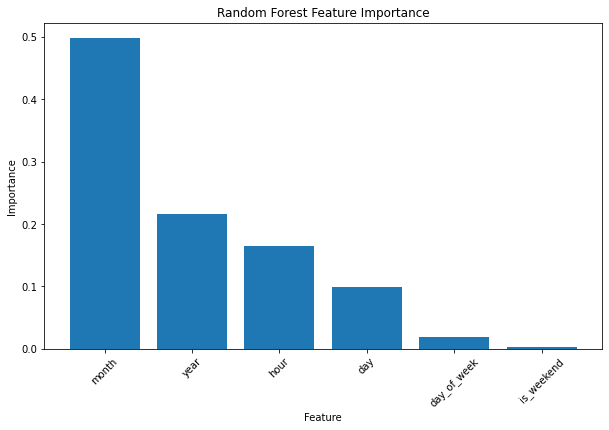

In [12]:
import matplotlib.pyplot as plt

# Assuming you've already trained the model and obtained feature_importance
feature_importance = model.feature_importances_

# Get feature names from the DataFrame columns
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importance.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [13]:
correlation_matrix = df.corr()
print(correlation_matrix['total power usage（kw）'])

total power usage（kw）    1.000000
year                    -0.267168
month                    0.187181
day                      0.034736
hour                     0.193779
is_weekend              -0.061582
day_of_week             -0.045852
Name: total power usage（kw）, dtype: float64


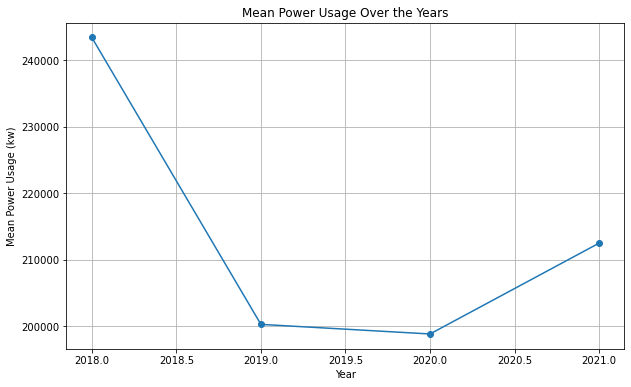

In [14]:
 import matplotlib.pyplot as plt

# Group the data by 'year' and calculate the mean power usage for each year
yearly_mean = df.groupby('year')['total power usage（kw）'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(yearly_mean.index, yearly_mean.values, marker='o')
plt.title('Mean Power Usage Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Power Usage (kw)')
plt.grid(True)

# Show the plot
plt.show()

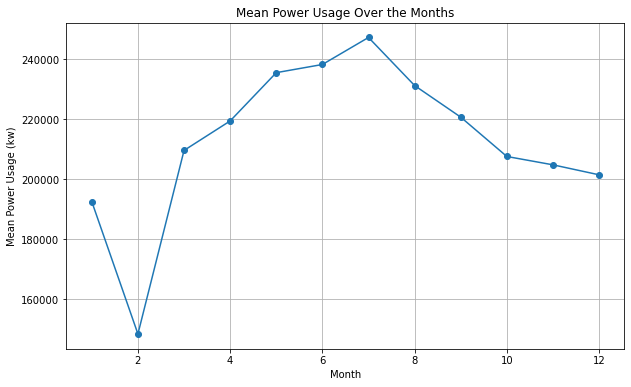

In [15]:
import matplotlib.pyplot as plt

# Group the data by 'month' and calculate the mean power usage for each month
monthly_mean = df.groupby('month')['total power usage（kw）'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(monthly_mean.index, monthly_mean.values, marker='o')
plt.title('Mean Power Usage Over the Months')
plt.xlabel('Month')
plt.ylabel('Mean Power Usage (kw)')
plt.grid(True)

# Show the plot
plt.show()

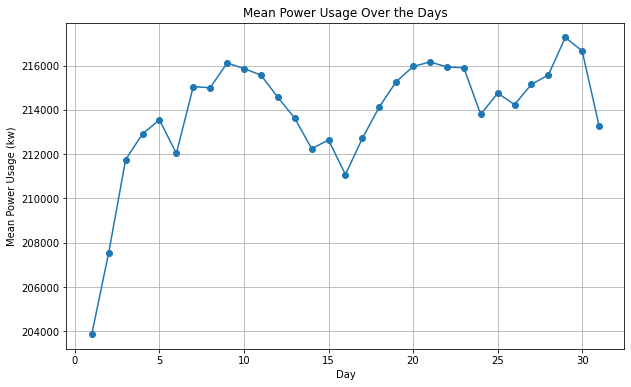

In [16]:
import matplotlib.pyplot as plt

# Group the data by 'day' and calculate the mean power usage for each day
daily_mean = df.groupby('day')['total power usage（kw）'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(daily_mean.index, daily_mean.values, marker='o')
plt.title('Mean Power Usage Over the Days')
plt.xlabel('Day')
plt.ylabel('Mean Power Usage (kw)')
plt.grid(True)

# Show the plot
plt.show()

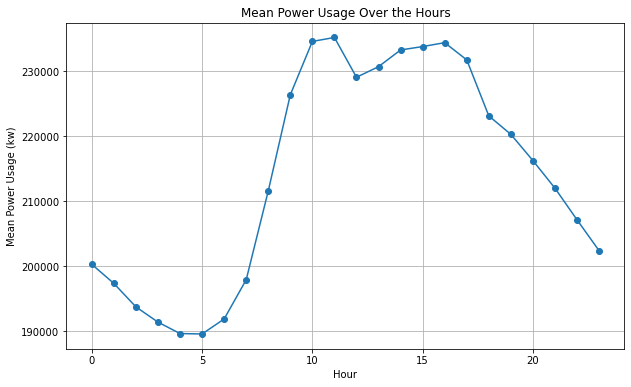

In [17]:
import matplotlib.pyplot as plt

# Group the data by 'hour' and calculate the mean power usage for each hour
hourly_mean = df.groupby('hour')['total power usage（kw）'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(hourly_mean.index, hourly_mean.values, marker='o')
plt.title('Mean Power Usage Over the Hours')
plt.xlabel('Hour')
plt.ylabel('Mean Power Usage (kw)')
plt.grid(True)

# Show the plot
plt.show()

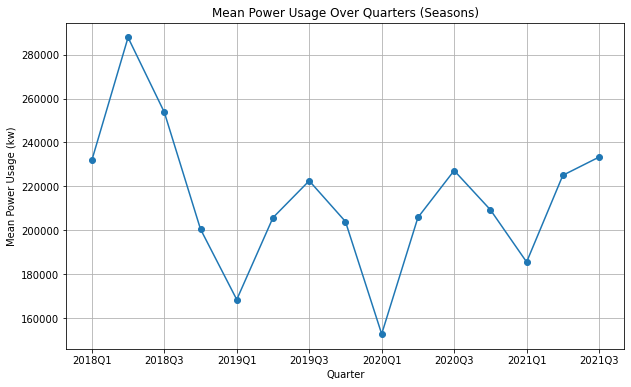

In [18]:
import matplotlib.pyplot as plt

# Combine 'year' and 'month' columns to create a 'quarter' column
df['quarter'] = (df['year'].astype(str) + 'Q' + ((df['month'] - 1) // 3 + 1).astype(str))

# Group the data by 'quarter' and calculate the mean power usage for each quarter
quarterly_mean = df.groupby('quarter')['total power usage（kw）'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
quarterly_mean.plot(kind='line', marker='o')
plt.title('Mean Power Usage Over Quarters (Seasons)')
plt.xlabel('Quarter')
plt.ylabel('Mean Power Usage (kw)')
plt.grid(True)

# Show the plot
plt.show()

In [19]:
df2 = df.set_index('datatime')

In [20]:
df2.head()

,total power usage（kw）,year,month,day,hour,is_weekend,day_of_week,quarter
datatime,,,,,,,,
2018-01-01 00:00:00,244033.7682,2018,1,1,0,0,0,2018Q1
2018-01-01 00:15:00,232720.6402,2018,1,1,0,0,0,2018Q1
2018-01-01 00:30:00,231685.6891,2018,1,1,0,0,0,2018Q1
2018-01-01 00:45:00,227581.3317,2018,1,1,0,0,0,2018Q1
2018-01-01 01:00:00,233482.4269,2018,1,1,1,0,0,2018Q1


In [21]:
df2 = df2.drop(columns={'year','day','hour','is_weekend','day_of_week','quarter'})
df2.head()

,total power usage（kw）,month
datatime,,
2018-01-01 00:00:00,244033.7682,1
2018-01-01 00:15:00,232720.6402,1
2018-01-01 00:30:00,231685.6891,1
2018-01-01 00:45:00,227581.3317,1
2018-01-01 01:00:00,233482.4269,1


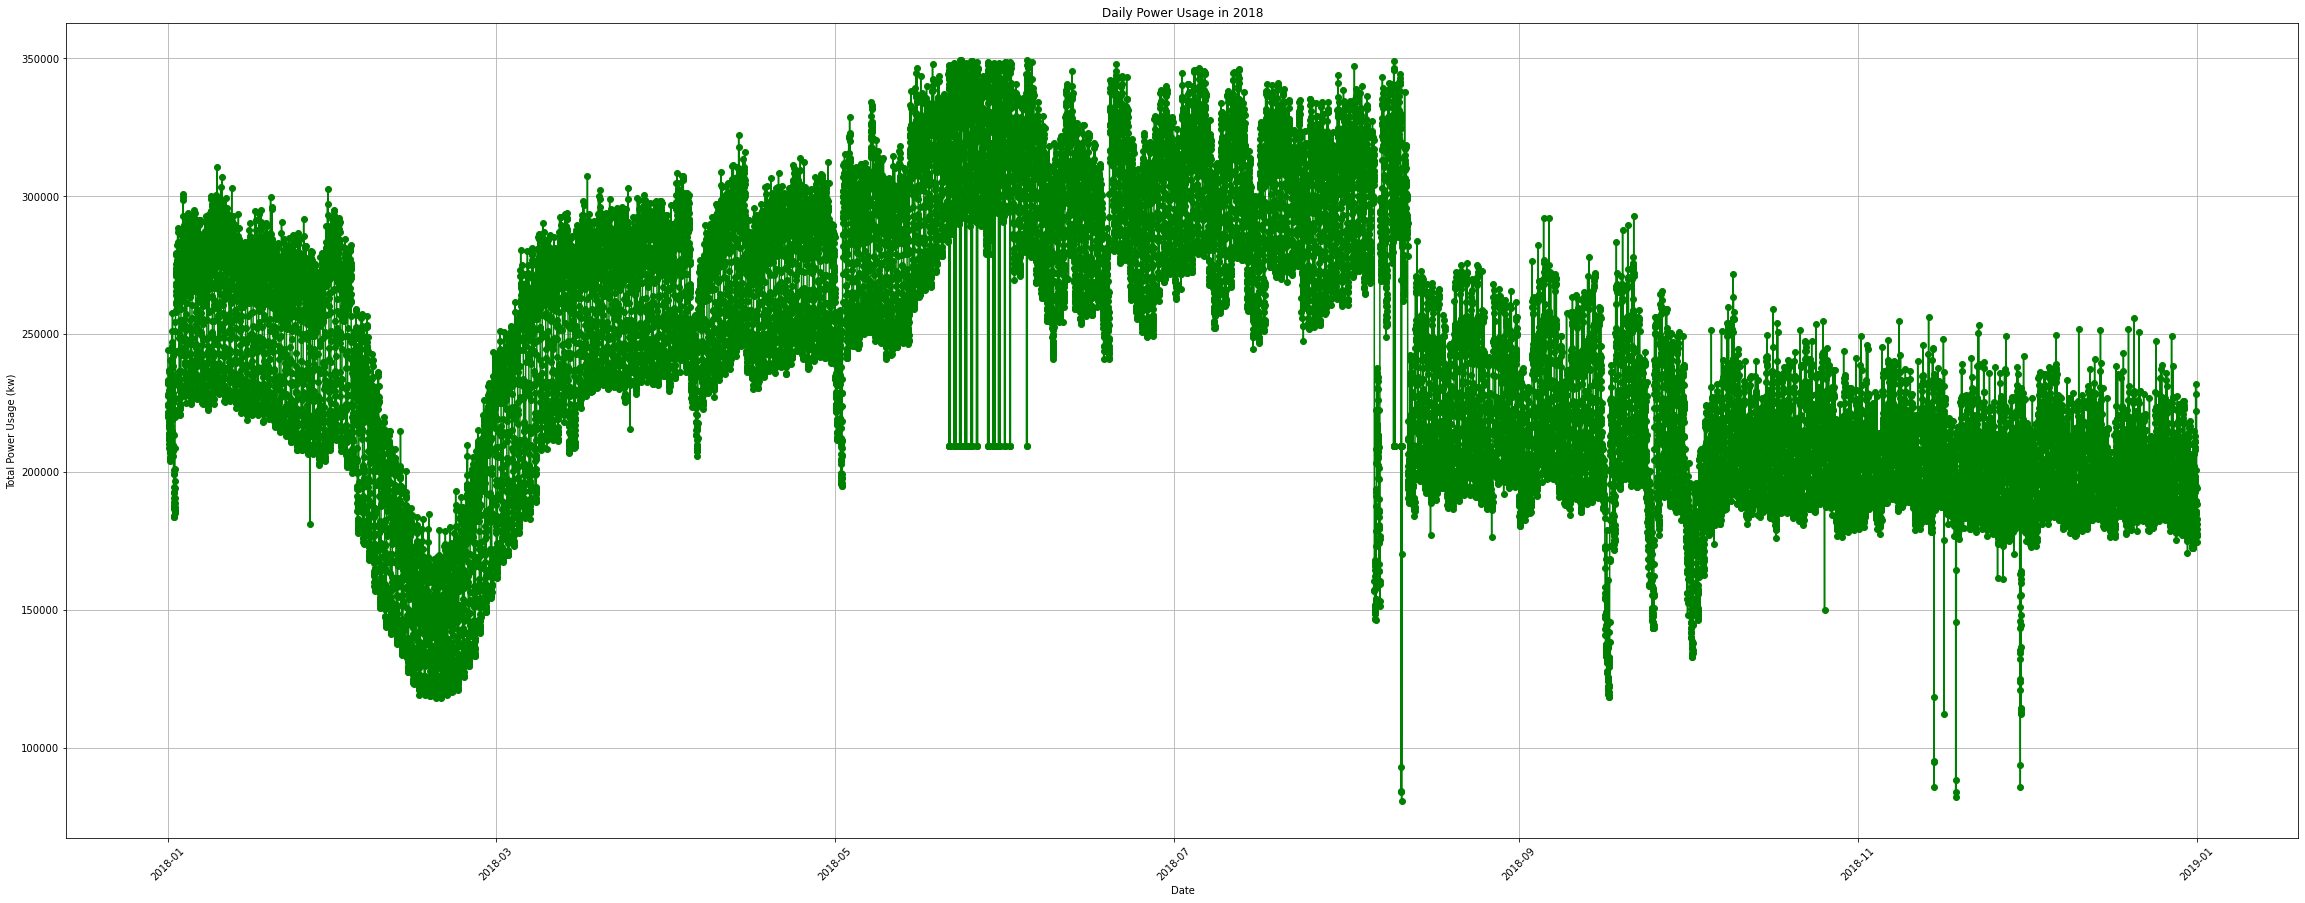

In [22]:
# 确保日期时间列是索引并已排序
df2.index = pd.to_datetime(df2.index)
df2 = df2.sort_index()

# 提取2018年的数据
df2_2018 = df2['2018']

# 绘制每天的用电负荷折线图
plt.figure(figsize=(40, 15))
plt.plot(df2_2018.index, df2_2018['total power usage（kw）'], marker='o', linestyle='-', color='green')
plt.title('Daily Power Usage in 2018')
plt.xlabel('Date')
plt.ylabel('Total Power Usage (kw)')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转 x 轴标签，以防止重叠
plt.show()

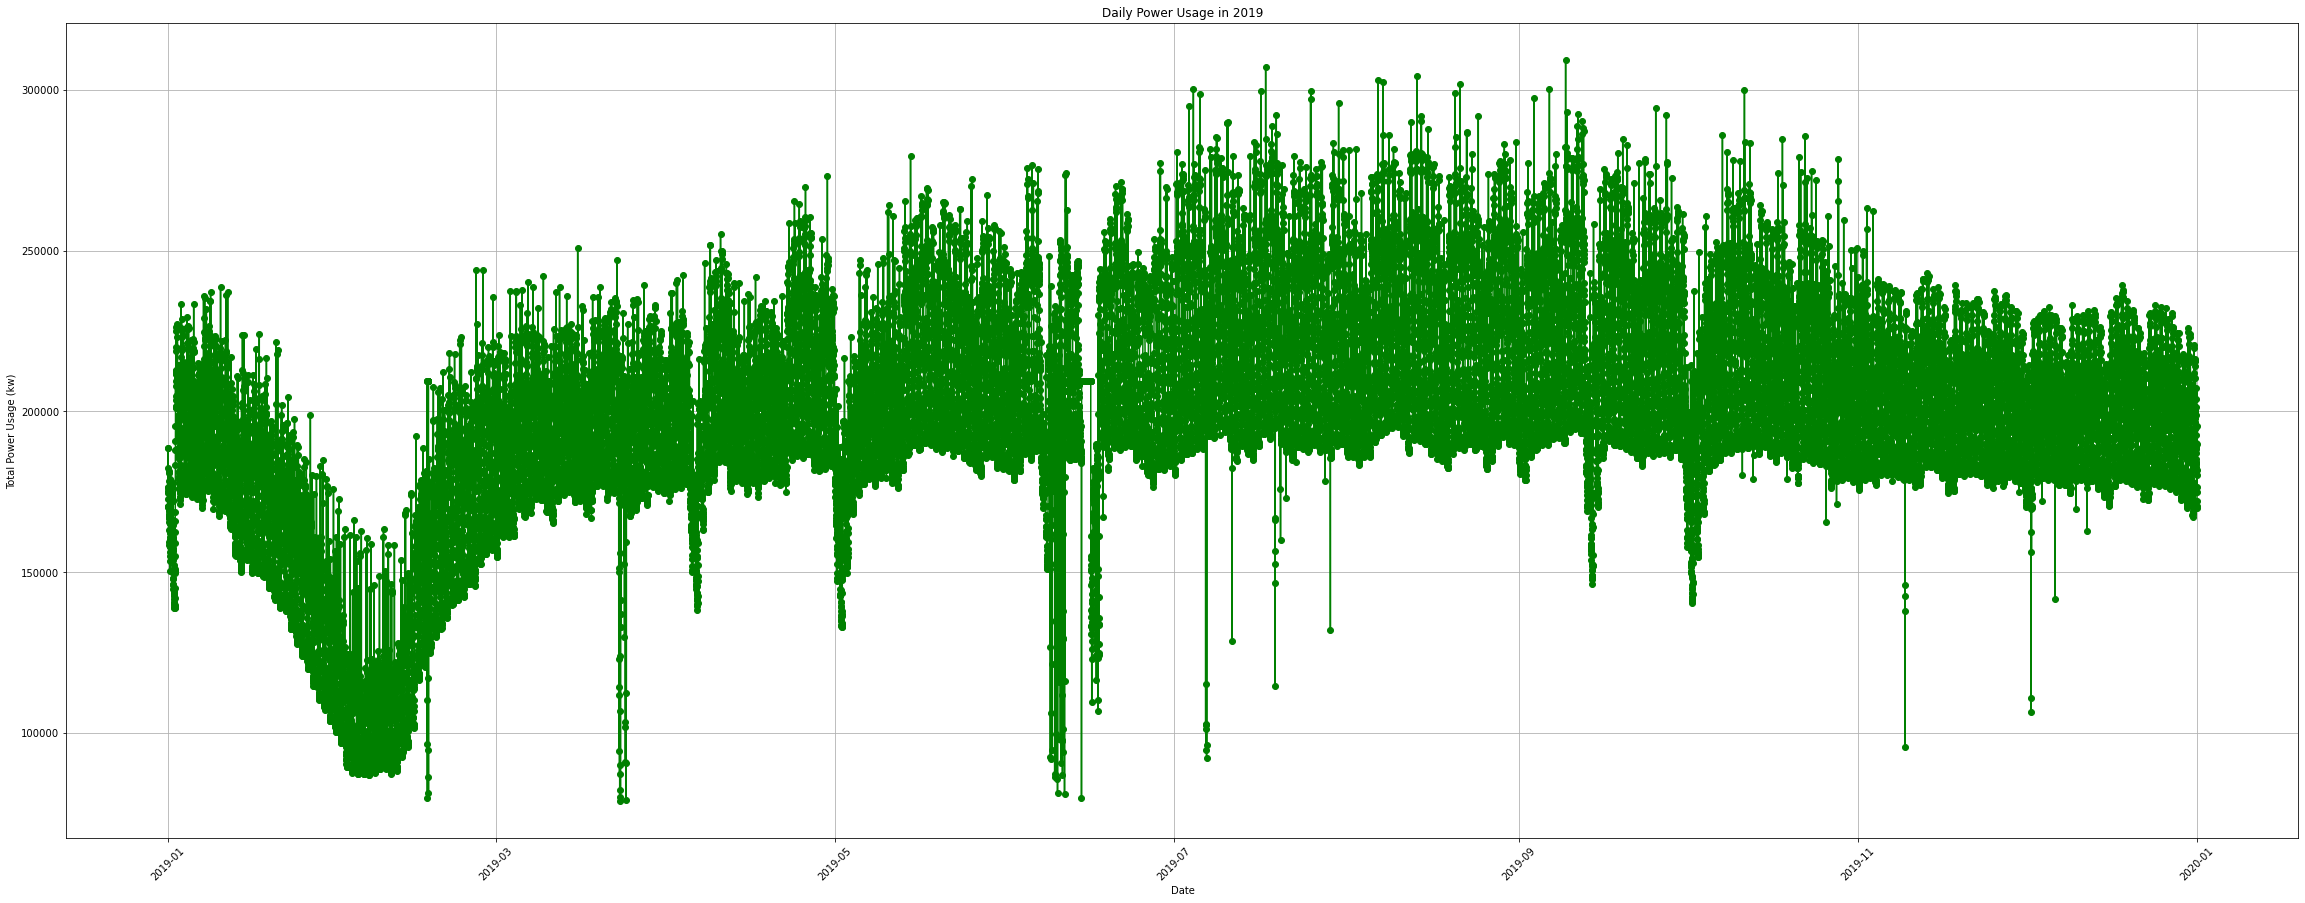

In [23]:
# 确保日期时间列是索引并已排序
df2.index = pd.to_datetime(df2.index)
df2 = df2.sort_index()

# 提取2019年的数据
df2_2019 = df2['2019']

# 绘制每天的用电负荷折线图
plt.figure(figsize=(40, 15))
plt.plot(df2_2019.index, df2_2019['total power usage（kw）'], marker='o', linestyle='-', color='green')
plt.title('Daily Power Usage in 2019')
plt.xlabel('Date')
plt.ylabel('Total Power Usage (kw)')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转 x 轴标签，以防止重叠
plt.show()

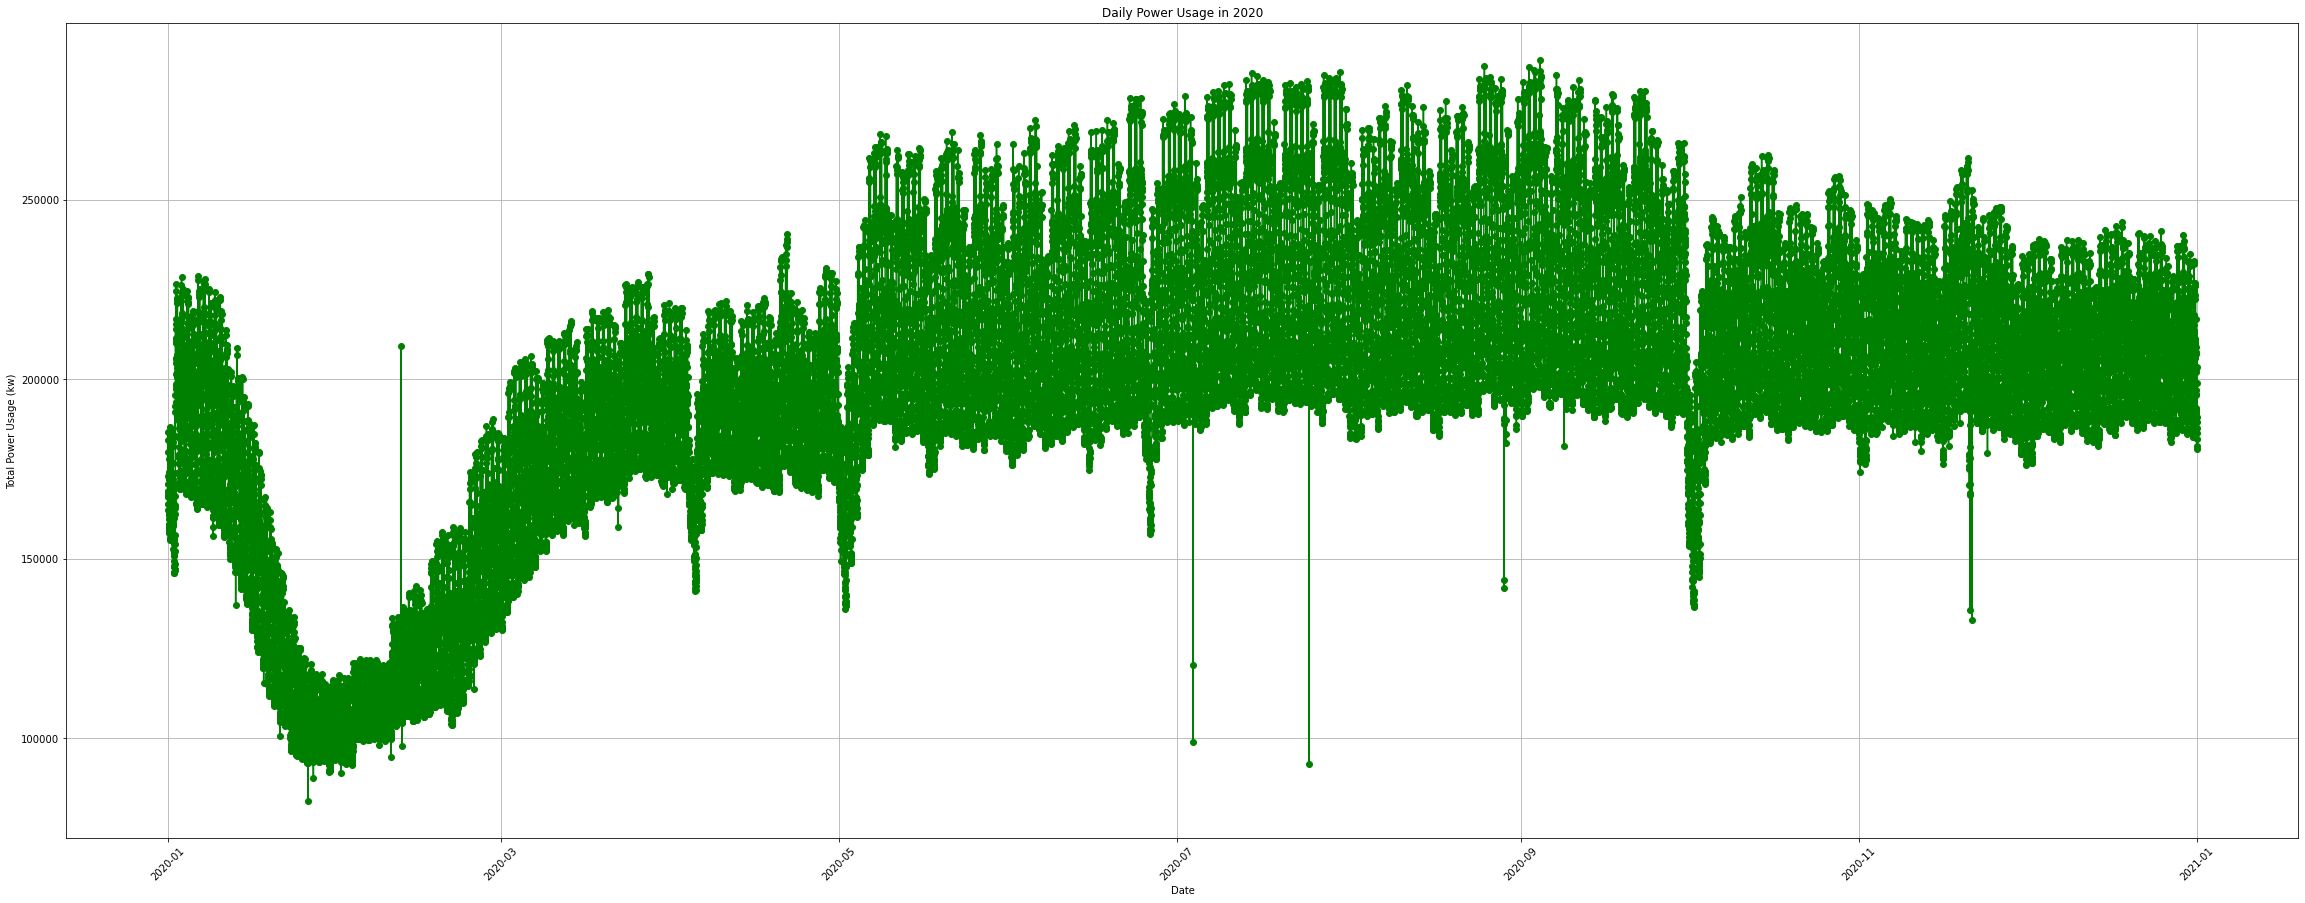

In [24]:
# 确保日期时间列是索引并已排序
df2.index = pd.to_datetime(df2.index)
df2 = df2.sort_index()

# 提取2020年的数据
df2_2020 = df2['2020']

# 绘制每天的用电负荷折线图
plt.figure(figsize=(40, 15))
plt.plot(df2_2020.index, df2_2020['total power usage（kw）'], marker='o', linestyle='-', color='green')
plt.title('Daily Power Usage in 2020')
plt.xlabel('Date')
plt.ylabel('Total Power Usage (kw)')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转 x 轴标签，以防止重叠
plt.show()

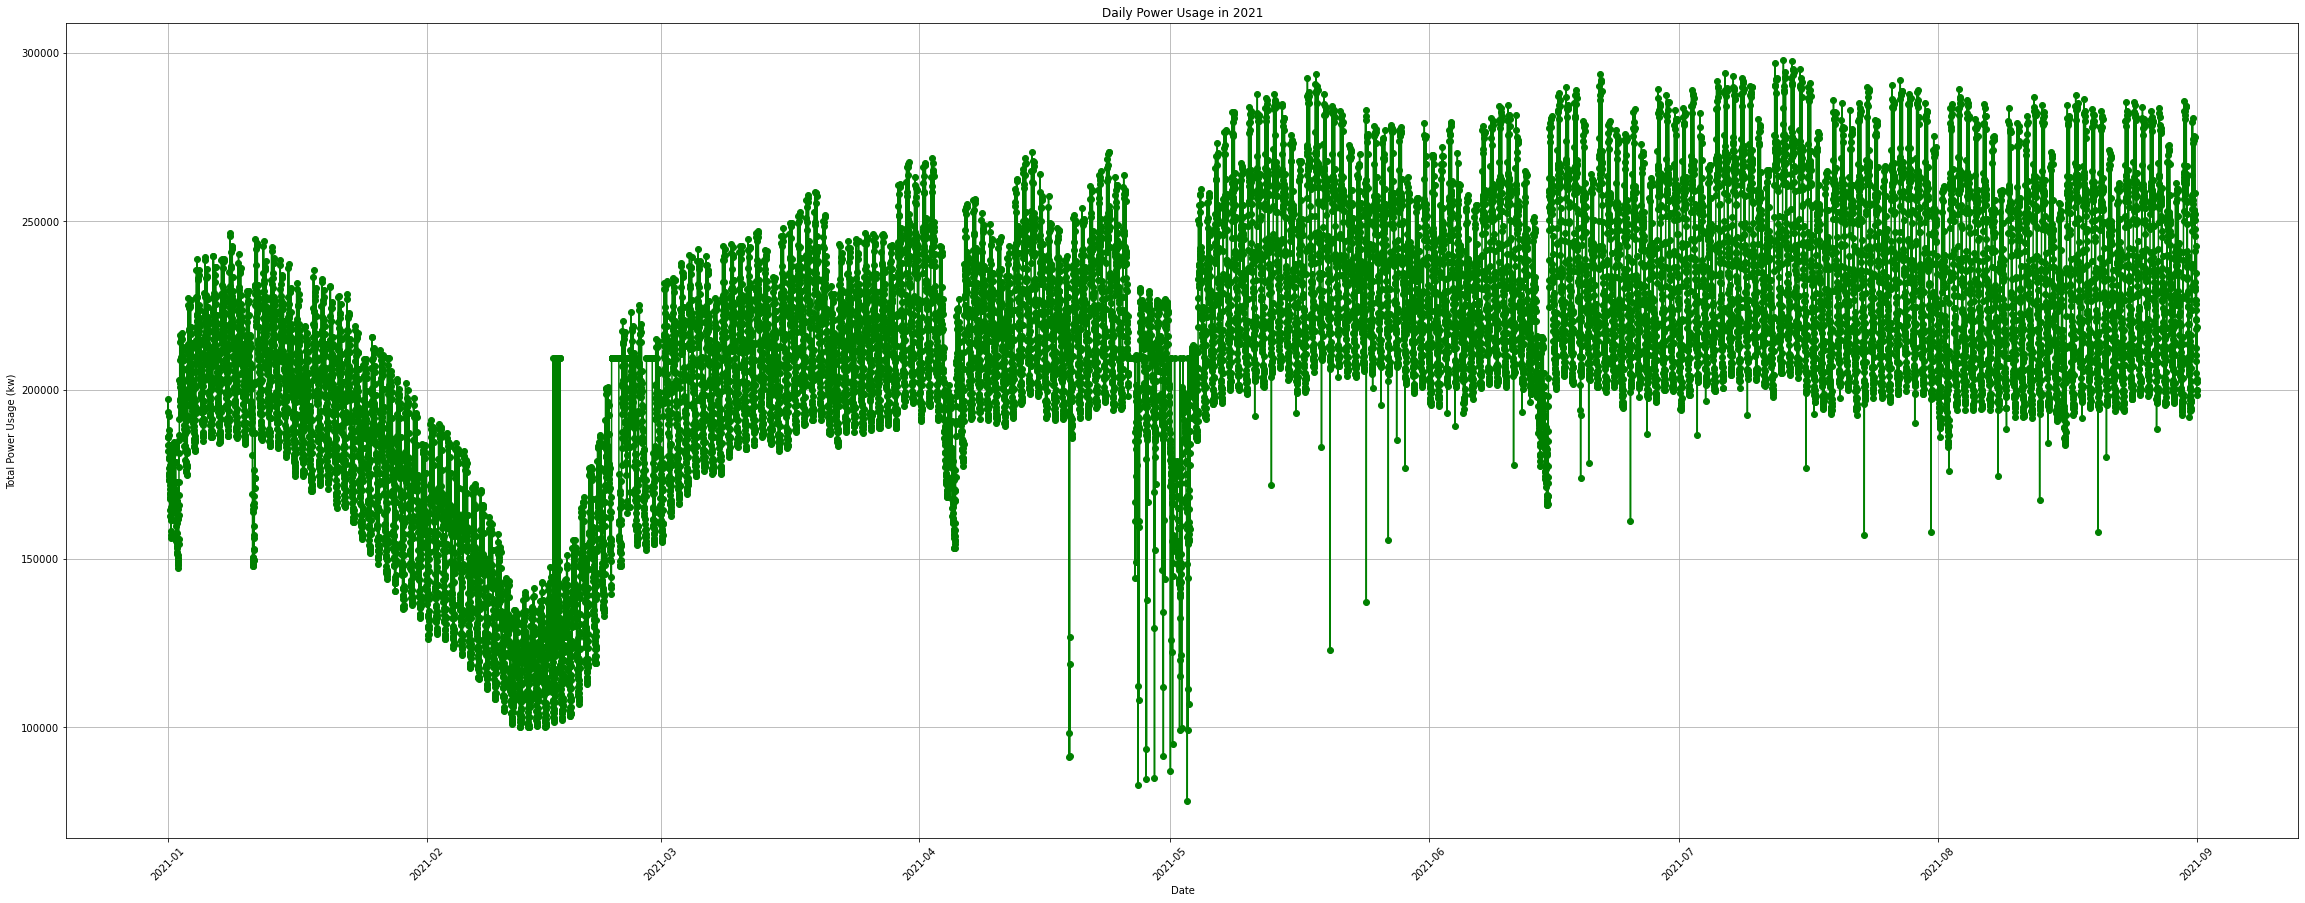

In [25]:
# 确保日期时间列是索引并已排序
df2.index = pd.to_datetime(df2.index)
df2 = df2.sort_index()

# 提取2021年的数据
df2_2021 = df2['2021']

# 绘制每天的用电负荷折线图
plt.figure(figsize=(40, 15))
plt.plot(df2_2021.index, df2_2021['total power usage（kw）'], marker='o', linestyle='-', color='green')
plt.title('Daily Power Usage in 2021')
plt.xlabel('Date')
plt.ylabel('Total Power Usage (kw)')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转 x 轴标签，以防止重叠
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller
 ##Check stationarity using ADF test
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    data1_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

In [27]:
##Note: Recall that:

#Null Hypothesis H0(p=0.05) : There is unit root in the time series data ---- the data is not stationary. Alternative Hypothesis H1(p<0.05) : 
#There is no unit root in the time series data ---- the data is stationary

In [28]:
##Here I selected  since it represents both "First.Time.Visits" and "Returning.Visits"
check_stationarity(df2['total power usage（kw）'])

The test statistic: -5.982220
p-value: 0.000000
Critical Values:
1%: -3.430
5%: -2.862
10%: -2.567


In [29]:
##Our Data is stationary but just to showcase how data differencing works 
##we will assume that our Time Series data is not Stationary.
##So Basically you have to subtract the value with their previous value to get the difference in data. 
##We will use numpy.diff() function to achieve that
import numpy as np
ts_log = np.log(df2['total power usage（kw）'])
ts_log

datatime
2018-01-01 00:00:00    12.405062
2018-01-01 00:15:00    12.357594
2018-01-01 00:30:00    12.353137
2018-01-01 00:45:00    12.335263
2018-01-01 01:00:00    12.360862
                         ...    
2021-08-31 22:45:00    12.218046
2021-08-31 23:00:00    12.294891
2021-08-31 23:15:00    12.206635
2021-08-31 23:30:00    12.205400
2021-08-31 23:45:00    12.198462
Name: total power usage（kw）, Length: 128544, dtype: float64

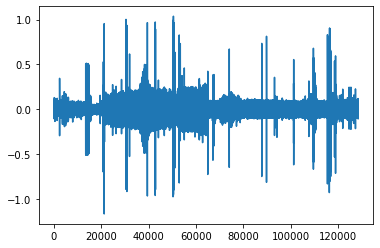

In [30]:
ts_log_diff = np.diff(ts_log)

plt.plot(ts_log_diff)
##The x-axis of the plot represents the time points, 
##and the y-axis represents the differences between consecutive logarithmic values.

In [31]:
check_stationarity(ts_log_diff)
###

The test statistic: -92.713024
p-value: 0.000000
Critical Values:
1%: -3.430
5%: -2.862
10%: -2.567


In [32]:
print(df2.columns)

Index(['total power usage（kw）', 'month'], dtype='object')


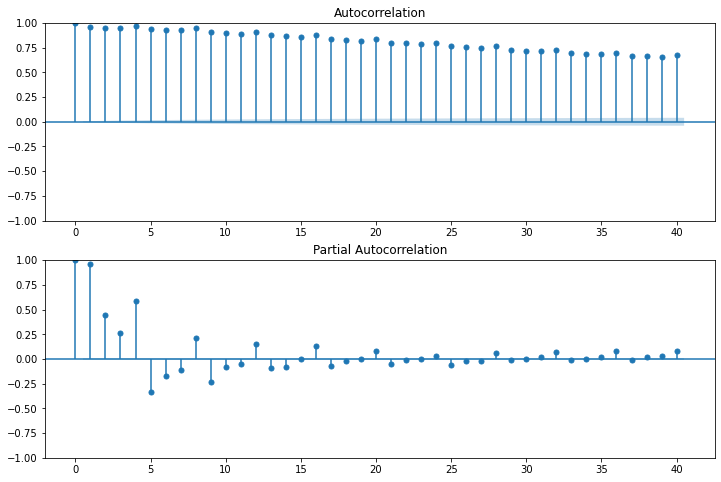

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['total power usage（kw）'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['total power usage（kw）'],lags=40,ax=ax2)

In [34]:
#train_size = int(len(df2) * 0.6)  # Add a closing parenthesis here
#train_data, test_data = df2[0:train_size], df2[train_size:]
split_date = '2020-01-01'

# Convert the split_date to a datetime object
split_date = pd.to_datetime(split_date)

# Split the data
train_data = df2[df2.index < split_date]
test_data = df2[df2.index >= split_date]

In [35]:
import pmdarima as pm
auto_arima_fit = pm.auto_arima(train_data['total power usage（kw）'], start_p=1, start_q=1,
                               max_p=3, max_q=3, m=12,
                               seasonal=False,
                               trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1520484.666, Time=35.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1536331.020, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1520080.637, Time=2.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1510270.756, Time=2.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1536329.020, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1509824.287, Time=4.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=41.70 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1507245.593, Time=6.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1505920.258, Time=15.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1502040.514, Time=38.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=41.68 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1488453.388, Time=29.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1489492.139, Time=22.50 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=1488451.387, Time=26.00 sec

In [36]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(train_data['total power usage（kw）'], order=(3, 1, 3))
results = mod.fit()
print(results.summary())

                                 SARIMAX Results                                 
Dep. Variable:     total power usage（kw）   No. Observations:                70080
Model:                    ARIMA(3, 1, 3)   Log Likelihood             -744218.694
Date:                   Thu, 28 Dec 2023   AIC                        1488451.387
Time:                           15:29:41   BIC                        1488515.489
Sample:                       01-01-2018   HQIC                       1488471.157
                            - 12-31-2019                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9427      0.002   -553.158      0.000      -0.946      -0.939
ar.L2         -0.7537      0.002   -377.127      0.000      -0.758      -0.750
ar.L3         -0.7533      0

<AxesSubplot:xlabel='datatime'>

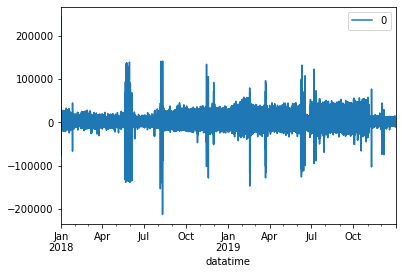

In [37]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

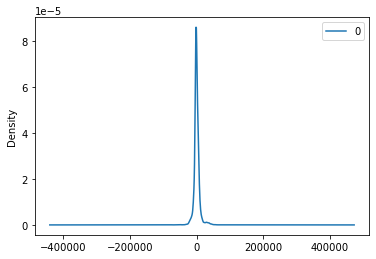

In [38]:
residuals.plot(kind='kde')

In [39]:
residuals.describe()

,0
count,70080.000000
mean,4.565193
std,9950.416524
min,-212472.430782
25%,-3587.760234
50%,-736.893911
75%,3112.699928
max,244033.768200


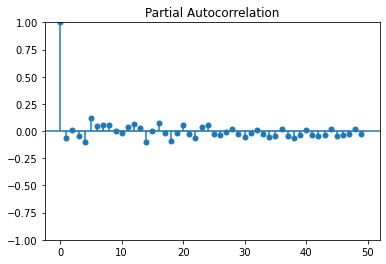

In [40]:
plot_pacf(residuals)
print()

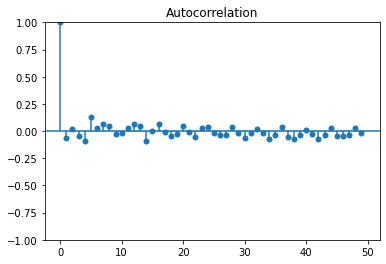

In [41]:
plot_acf(residuals)
print()

# ARIMA Predict

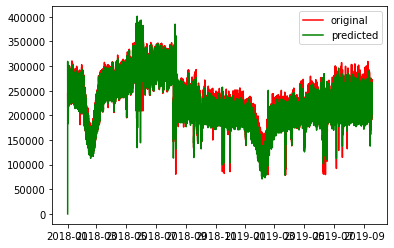

In [55]:
from math import sqrt
from sklearn.metrics import mean_squared_error

plt.plot(df2['total power usage（kw）'][:60000],label = 'original', color='r' )
plt.plot(results.predict(0,60000),label = 'predicted', color='g' )

plt.legend()

In [69]:
n=96000 ##We are forecasting the website visits for next 90 days ，30days so our steps will be 90
forecast = results.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='09/01/2020', periods=n, freq='15T'))
print(df_forecast)

                          forecast
2020-09-01 00:00:00  172792.785872
2020-09-01 00:15:00  172792.785872
2020-09-01 00:30:00  172792.785872
2020-09-01 00:45:00  172792.785872
2020-09-01 01:00:00  172792.785872
...                            ...
2023-05-28 22:45:00            NaN
2023-05-28 23:00:00            NaN
2023-05-28 23:15:00            NaN
2023-05-28 23:30:00            NaN
2023-05-28 23:45:00            NaN

[96000 rows x 1 columns]


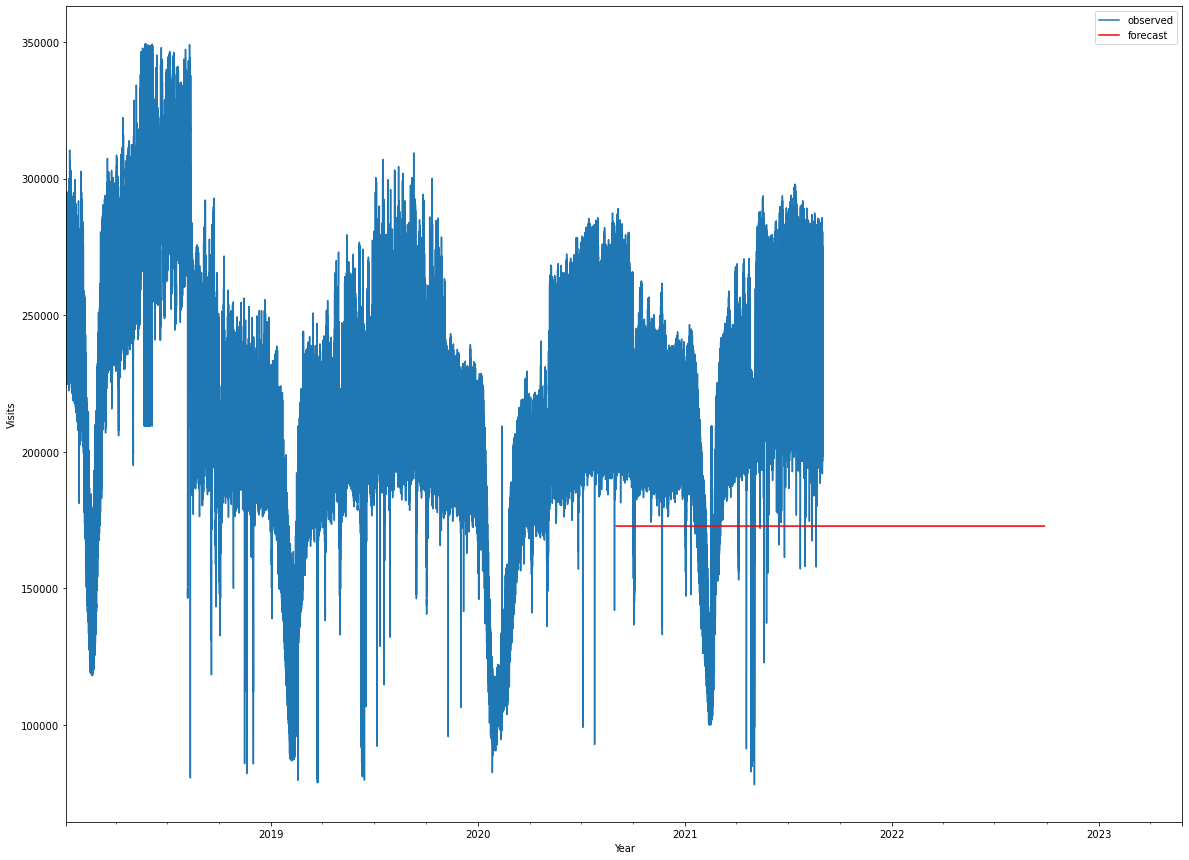

In [70]:
ci = df_forecast.values
ax3 = df2[300:]['total power usage（kw）'].plot(label='observed', figsize=(20, 15))
df_forecast.plot(ax=ax3,label='Forecast',color='r')
ax3.fill_between(df_forecast.index,
                ci[:,-1],
                ci[:,0], color='b', alpha=.25)
ax3.set_xlabel('Year')
ax3.set_ylabel('Visits')

plt.legend()
plt.show()

In [72]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse=rmse(train_data['total power usage（kw）'], results.predict())
print("The rmse value is:",rmse) 

#Calculate mean absolute_error 
mae=mean_absolute_error(train_data['total power usage（kw）'], results.predict())
print("The mae value is:",mae) 

# Calculate mean squared error
mse = mean_squared_error(train_data['total power usage（kw）'], results.predict())
print("The mse value is:",mse)

The rmse value is: 9950.346578233115
The mae value is: 5518.960895760219
The mse value is: 99009397.02695546


In [73]:
df.set_index('datatime', inplace=True)
data = df.resample('15T').ffill()

In [74]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order (p, d, q) based on the ACF and PACF plots
p, d, q = 3, 1, 3  # Example values, adjust as needed

# Create and fit the ARIMA model
model = ARIMA(data['total power usage（kw）'], order=(p, d, q))
results = model.fit()

In [75]:
import pandas as pd
from datetime import datetime, timedelta

# Define the number of 15-minute intervals in 10 days
forecast_intervals = 10 * 24 * 4  # 10 days * 24 hours/day * 4 intervals/hour

# Generate timestamps for the forecasted period
forecast_start = data.index[-1] + pd.Timedelta(minutes=15)
forecast_end = forecast_start + pd.Timedelta(minutes=15 * (forecast_intervals - 1))
forecast_index = pd.date_range(forecast_start, forecast_end, freq='15T')

# Forecast the next 10 days of 15-minute intervals
forecast = results.forecast(steps=forecast_intervals)
forecast_series = pd.Series(forecast, index=forecast_index)

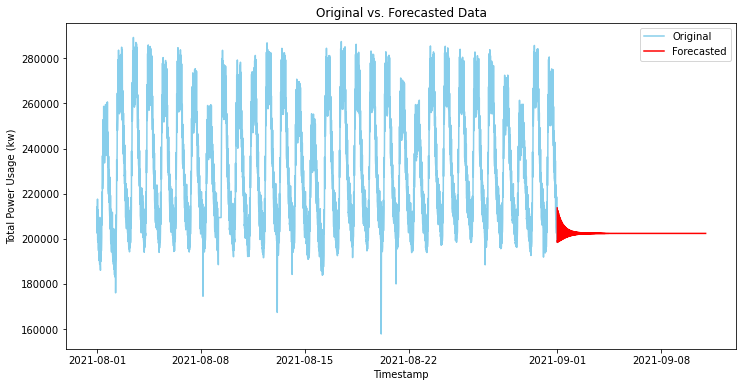

In [78]:
import matplotlib.pyplot as plt

start_date = '2021-08-01'
filtered_data = data[data.index >= start_date]
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['total power usage（kw）'], label='Original', color='skyblue')
plt.plot(forecast_series, label='Forecasted', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Total Power Usage (kw)')
plt.title('Original vs. Forecasted Data')
plt.legend()
plt.show()

In [79]:
print(forecast_series)

2021-09-01 00:00:00    213652.407639
2021-09-01 00:15:00    198395.741213
2021-09-01 00:30:00    199409.963505
2021-09-01 00:45:00    198589.806635
2021-09-01 01:00:00    212442.215103
                           ...      
2021-09-10 22:45:00    202374.924600
2021-09-10 23:00:00    202374.925334
2021-09-10 23:15:00    202374.924613
2021-09-10 23:30:00    202374.925322
2021-09-10 23:45:00    202374.924625
Freq: 15T, Name: predicted_mean, Length: 960, dtype: float64
